In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
np.random.seed(seed=101)
X = 2*np.random.rand(100,1)
y= 4+3*X + np.random.randn(100,1)

np.random.seed(seed=103)
X = 2*np.random.rand(100,1)
y= 4+3*X + np.random.randn(100,1)

Text(0.5, 0, 'eurosA (u/10000)')

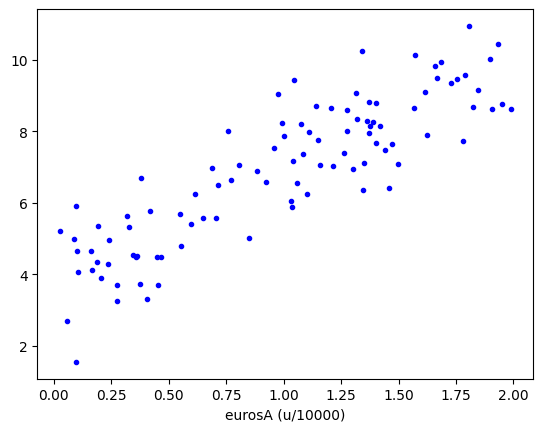

In [19]:
plt.plot(X,y,"b.")
plt.xlabel('EA (u/1000)')
plt.xlabel('eurosA (u/10000)')

In [20]:

data = {'n_eq_afect':X.flatten(), 'coste':y.flatten()}
df = pd.DataFrame(data)
df.head()

,n_eq_afect,coste
0,1.032797,6.051612
1,1.141335,8.716770
2,0.056948,2.703331
3,0.343043,4.535035
4,1.370554,7.949127


In [21]:
df['n_eq_afect'] = df['n_eq_afect']*1000
df['n_eq_afect'] = df['n_eq_afect'].astype('int')
df['coste'] = df['coste']*10000
df['coste'] = df['coste'].astype('int')
df.head()

,n_eq_afect,coste
0,1032,60516
1,1141,87167
2,56,27033
3,343,45350
4,1370,79491


Text(0.5, 0, 'eurosA (u/10000)')

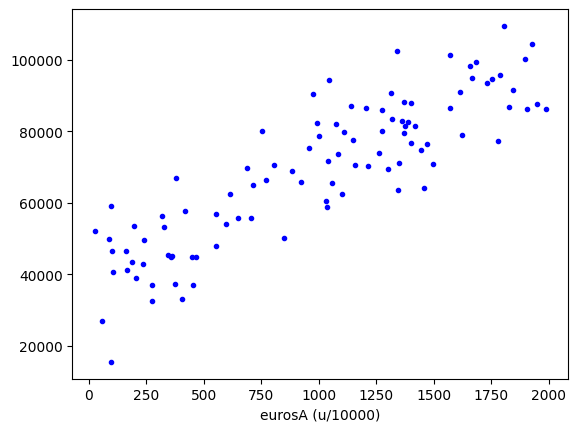

In [22]:
plt.plot(df['n_eq_afect'] ,df['coste'],"b.")
plt.xlabel('EA (u/1000)')
plt.xlabel('eurosA (u/10000)')

In [23]:
lin_reg = LinearRegression()
lin_reg.fit(df['n_eq_afect'].values.reshape(-1,1), df['coste'].values)

LinearRegression()

In [24]:
X_min_max = np.array([[df['n_eq_afect'].min()], [df['n_eq_afect'].max()]])

In [25]:
y_train_pred = lin_reg.predict(X_min_max)
y_train_pred

array([39383.67324331, 99977.6029037 ])

Text(0.5, 0, 'Coste')

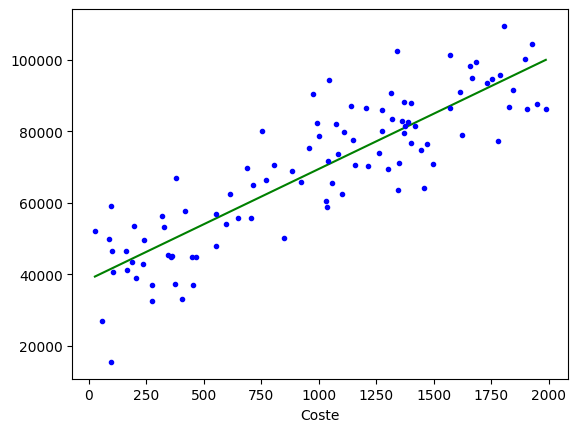

In [26]:
plt.plot(X_min_max, y_train_pred, 'g-')
plt.plot(df['n_eq_afect'] ,df['coste'],"b.")
plt.xlabel('Equipos Afectados')
plt.xlabel('Coste')

In [27]:
y_train_pred = lin_reg.predict(df['n_eq_afect'].values.reshape(-1,1))
y_train_pred

array([70452.73197845, 73819.06140403, 40310.18592925, 49173.82395806,
       80891.44157336, 90063.91716415, 57512.43813151, 93769.96790791,
       83145.95577581, 50285.63918119, 72799.8974495 , 60322.85994553,
       49791.49908202, 87099.07656915, 98186.34504422, 52910.75845802,
       43738.28286722, 75857.3893131 , 83578.32836258, 55628.52900344,
       80891.44157336, 70545.38324705, 41545.53617717, 47073.7285366 ,
       50100.336644  , 99977.6029037 , 70730.68578424, 74313.2015032 ,
       83948.93343696, 72027.80354455, 94974.43439963, 88457.96184186,
       63442.11932152, 60631.69750751, 97414.25113927, 59797.83609016,
       92009.59380463, 89847.73087077, 71811.61725116, 95530.34201119,
       44572.14428457, 44911.86560275, 81910.60552789, 93553.78161452,
       48432.61380931, 55597.64524724, 80088.46391222, 48710.5676151 ,
       81879.7217717 , 68692.35787517, 80613.48776758, 70792.45329663,
       41236.69861519, 52385.73460265, 74097.01520981, 45992.79706968,
      

In [28]:
mse = mean_squared_error(df['coste'], y_train_pred)
rmse = np.sqrt(mse)
r2 = r2_score(df['coste'], y_train_pred)

print(f"mse={mse}")
print(f"rmse={rmse}")
print(f"r2={r2}")

mse=98332209.35048538
rmse=9916.259846861889
r2=0.7559553565518861


Text(0.5, 0, 'Coste')

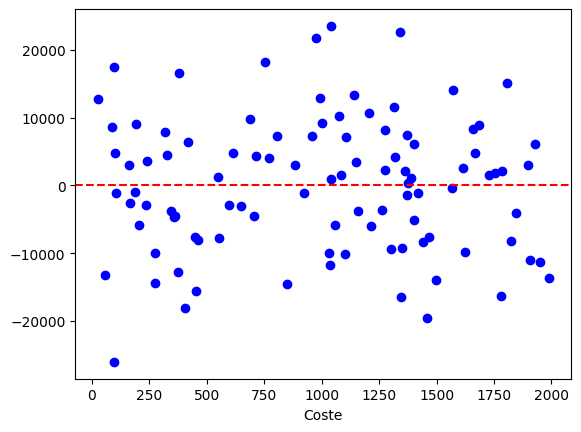

In [29]:
residuo = df['coste'] - y_train_pred

plt.scatter(df['n_eq_afect'], residuo, color = "blue")
plt.axhline(y=0, color = 'red', linestyle='--')
plt.xlabel('Equipos Afectados')
plt.xlabel('Coste')

In [30]:
np.random.seed(seed=103)
X_test = 2*np.random.rand(100,1)
y_test = 4+3*X + np.random.randn(100,1)

data_test = {'n_eq_afect':X_test.flatten(), 'coste':y_test.flatten()}
df_test = pd.DataFrame(data_test)
X_min_max_test = np.array([[df['n_eq_afect'].min()], [df['n_eq_afect'].max()]])

In [31]:
y_test_pred = lin_reg.predict(X_min_max_test)
y_test_pred

array([39383.67324331, 99977.6029037 ])

Text(0.5, 0, 'Coste')

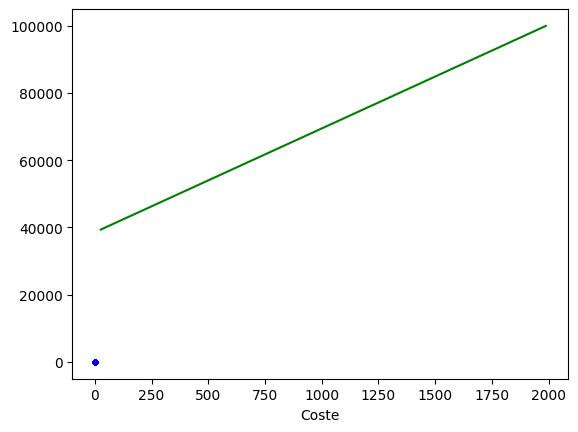

In [32]:
plt.plot(X_min_max_test, y_test_pred, 'g-')
plt.plot(df_test['n_eq_afect'] ,df_test['coste'],"b.")
plt.xlabel('Equipos Afectados')
plt.xlabel('Coste')

In [33]:
mse_test = mean_squared_error(df_test['coste'], y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(df['coste'], y_test_pred)

print(f"mse={mse_test}")
print(f"rmse={rmse_test}")
print(f"r2={r2_test}")

ValueError: Found input variables with inconsistent numbers of samples: [100, 2]

In [ ]:
residuo_test = df_test['coste'] - y_test_pred

plt.scatter(df_test['n_eq_afect'], residuo_test, color = "blue")
plt.axhline(y=0, color = 'red', linestyle='--')
plt.xlabel('Equipos Afectados')
plt.xlabel('Coste')